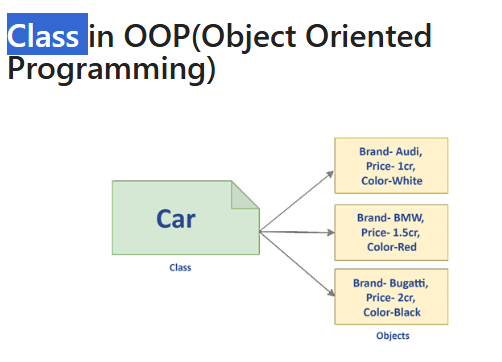

In [1]:
a = 23
print(type(a))

<class 'int'>


In [2]:
b = 45
print(type(b))

<class 'int'>


In [3]:
c = [1,2,3,4,5]
print(type(c))

<class 'list'>


In [4]:
c.append(6)
print(c)

[1, 2, 3, 4, 5, 6]


In [5]:
d = {
    101:"ATHARV",
    102:"AARADHYA",
    103:"AROH"
}
print(type(d))

<class 'dict'>


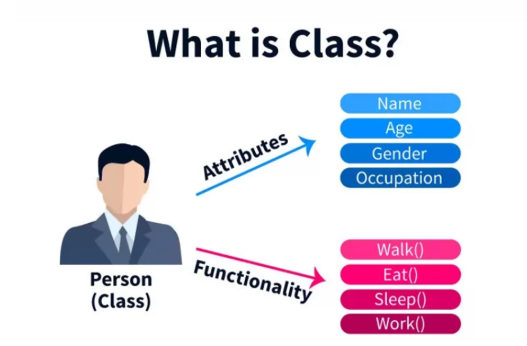

In [6]:
emp = {
    "id":[101,102,103,104],
    "name":["Atharv","Aroh","Aaradhya","Aarya"],
    "dept":["HR","sALES","ENG","IT"],
    "sal":[27000,15000,20000,8000]
}

In [ ]:
type(emp)

dict

In [8]:
print(type(emp))

<class 'dict'>


In [9]:
import pandas as pd
df = pd.DataFrame(emp)

In [10]:
df

,id,name,dept,sal
0,101,Atharv,HR,27000
1,102,Aroh,sALES,15000
2,103,Aaradhya,ENG,20000
3,104,Aarya,IT,8000


In [11]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Atributes of Dataframe 
1.Shape
2.Dtypes
3.Columns
4.Index
5.Values

In [12]:
df.shape

(4, 4)

In [13]:
df.columns

Index(['id', 'name', 'dept', 'sal'], dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [15]:
df.values

array([[101, 'Atharv', 'HR', 27000],
       [102, 'Aroh', 'sALES', 15000],
       [103, 'Aaradhya', 'ENG', 20000],
       [104, 'Aarya', 'IT', 8000]], dtype=object)

In [16]:
df.dtypes

id       int64
name    object
dept    object
sal      int64
dtype: object

In [17]:
type(df.values)

numpy.ndarray

### Function In DataFrame

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4 non-null      int64 
 1   name    4 non-null      object
 2   dept    4 non-null      object
 3   sal     4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


In [19]:
df.sort_values(by="sal",ascending=False)

,id,name,dept,sal
0,101,Atharv,HR,27000
2,103,Aaradhya,ENG,20000
1,102,Aroh,sALES,15000
3,104,Aarya,IT,8000


In [20]:
df.agg({"sal":["sum","mean"]})

,sal
sum,70000.0
mean,17500.0


In [21]:
df.head(2)

,id,name,dept,sal
0,101,Atharv,HR,27000
1,102,Aroh,sALES,15000


 #### Creating User Defined Class 
self - is any object belonging to respective class

In [22]:
class Person:
    #Stroe the attributes of class in construtor function 
    def __init__(self,name,age,gender,occupation):
        self.name = name
        self.age = age
        self.gender = gender
        self.occupation = occupation
    def introduce(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} yrs old")
        print(f"I am {self.gender}")
        print(f"I work as a {self.occupation}")


In [23]:
p1 = Person("Atharv",21,"Male","Data scientist")
p1

In [24]:
print(type(p1))

<class '__main__.Person'>


In [25]:
p1.age

21

In [26]:
p1.gender

'Male'

In [27]:
p1.introduce()

My name is Atharv
I am 21 yrs old
I am Male
I work as a Data scientist


In [28]:
p2 = Person(name="Aroh", age=10, gender="male", occupation="Student")
type(p2)


__main__.Person

In [29]:
p2.introduce()

My name is Aroh
I am 10 yrs old
I am male
I work as a Student


## Dataclasses

In dataclasses __post_init__ used for validation 

In [30]:
from dataclasses import dataclass
from typing import Literal

In [31]:
@dataclass
class Person2:
    name:str
    age:int
    gender:Literal["Male","Female"]
    occupation:str

    def __post_init__(self):
        errors = []

        if type(self.name) != str:
            errors.append("Name should be string")
        if type(self.age) != int or (self.age <= 0):
            errors.append("Age should be a positive integer")
        if self.gender not in ["Male","Female"]:
            errors.append("Gender should be either male or female")
        if type(self.occupation) != str:
            print("occupation should be a string")


        if errors:
            raise ValueError("\n".join(errors))

    def intro(self):
        print(f"My name is {self.name}") 
        print(f"I am {self.age} yers old")
        print(f"I am {self.gender}")
        print(f"I work as {self.occupation}")      

In [32]:
p4 = Person2(name= "Rahul", age=35, gender="Male", occupation="Purchase")
p4


Person2(name='Rahul', age=35, gender='Male', occupation='Purchase')

In [33]:
p4.intro()

My name is Rahul
I am 35 yers old
I am Male
I work as Purchase


In [34]:
p6 = Person2(name="Priyanka", age=38, gender="Female", occupation="Engg.")

In [35]:
p6.intro()

My name is Priyanka
I am 38 yers old
I am Female
I work as Engg.


#### Creating Class for Bank Account & Functions of Bank

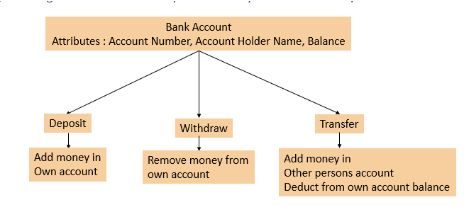

In [36]:
@dataclass
class Account:
    ac_no:int
    name:str
    bal:float

    def __post_init__(self):
        errors = []

        if type(self.ac_no) != int or self.ac_no <= 0:
            errors.append("Account number should be positive integer")

        if type(self.name) != str or len(self.name) == 0:
            errors.append("name should be a string")

        if type(self.bal) != float:
            errors.append("Balance should be float type")

        if errors:
            raise ValueError("\n".join(errors))
        
def check_balance(self):
    print(f"Current balance of your ac no {self.ac_no} is {self.bal:2f}INR")

def deposit(self,amt:float):
    self.bal = self.bal + amt
    print(f"Amount of {amt}INR deposited in {self.ac_no}")

def withdraw(self,amt:float):
    if self.bal < amt:
        raise ValueError("Insufficient balance")
    else:
        self.bal = self.bal - amt
        print(f"Amount of {amt:2f} INR withdrawen from {self.ac_no}")

def transfer(self, amt:float,ac2):
    self.withdraw(amt)
    ac2.deposit(amt)

In [37]:
ac1 = Account(ac_no=1234, name="Raman", bal=3000.0)

In [38]:
ac1 

Account(ac_no=1234, name='Raman', bal=3000.0)

In [39]:
ac1.check_balance()

AttributeError: 'Account' object has no attribute 'check_balance'

In [42]:
@dataclass
class Account:
    ac_no: int
    name: str
    bal: float

    def __post_init__(self):
        errors = []

        if type(self.ac_no) != int or self.ac_no <= 0:
            errors.append("Account number should be postive integer")
        if type(self.name) != str or len(self.name) == 0:
            errors.append("Name should be a string and should not be blank")
        if type(self.bal) != float:
            errors.append("Balance should be a float type")

        if errors:
            raise ValueError("\n".join(errors))
        
    def check_balance(self):
        print(f"Current balance in {self.ac_no} is {self.bal:.2f} INR")

    def deposit(self, amt: float):
        self.bal = self.bal + amt
        print(f"Amount of {amt:.2f} INR deposited in {self.ac_no}")

    def withdraw(self, amt: float):
        if self.bal < amt:
            raise ValueError("Insufficient balance!")
        else:
            self.bal = self.bal - amt
            print(f"Amount of {amt:.2f} INR withdraw from {self.ac_no}")

    def transfer(self, amt: float, ac2):
        self.withdraw(amt)
        ac2.deposit(amt)

In [43]:
ac1 = Account(ac_no=1234, name="Raman", bal=3000.0)
ac1

Account(ac_no=1234, name='Raman', bal=3000.0)

In [45]:
ac1.check_balance()

Current balance in 1234 is 3000.00 INR


In [47]:
ac1.deposit(500.0)

Amount of 500.00 INR deposited in 1234


In [48]:
ac1.check_balance()

Current balance in 1234 is 3500.00 INR


In [49]:
ac1.withdraw(1000)

Amount of 1000.00 INR withdraw from 1234


In [50]:
ac1.check_balance()

Current balance in 1234 is 2500.00 INR


In [53]:
ac2 = Account(ac_no=7890, name="Priya", bal=1000.0)
ac2

Account(ac_no=7890, name='Priya', bal=1000.0)

#### Transfer 500 from Ac1 to Ac2

In [54]:
ac1.transfer(500,ac2)

Amount of 500.00 INR withdraw from 1234
Amount of 500.00 INR deposited in 7890


In [55]:
ac2.check_balance()
ac1.check_balance()

Current balance in 7890 is 1500.00 INR
Current balance in 1234 is 1800.00 INR


### Assignment 1

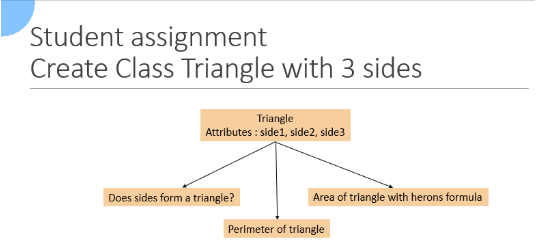

In [43]:
class Triangle:
    def __init__(self,side1,side2,side3):
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3

    def valid_triangle(self):
        return (
            self.side1 + self.side2 > self.side3 and
            self.side1 + self.side3 > self.side2 and
            self.side2 + self.side3 > self.side1
        )
    
    def perimeter(self):
        """
        Calculate the perimeter of the triangle.
        Returns the perimeter if the triangle is valid; otherwise, returns None.
        """
        if self.valid_triangle():
            return self.side1 + self.side2 + self.side3
        else:
            return None


side1 = int(input("Enter side 1"))
side2 = int(input("Enter side 2"))
side3 = int(input("Enter side 3"))

triangle = Triangle(side1,side2,side3)

if triangle.valid_triangle():
    print("The sides form a valid triangle ")
    print(f"The perimeter of the triangle is: {triangle.perimeter()}")
else:
    print("The sides do not form valid triangle")

The sides form a valid triangle 
The perimeter of the triangle is: 12
